In [22]:
import pandas as pd 

df = pd.read_csv(r"C:\Users\marti\Downloads\owid-covid-data.csv")



In [23]:
print(df)

       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
401107      ZWE    Africa     Zimbabwe  2024-05-08     266362.0        0.0   
401108      ZWE    Africa     Zimbabwe  2024-05-09     266362.0        0.0   
401109      ZWE    Africa     Zimbabwe  2024-05-10     266362.0        0.0   
401110      ZWE    Africa     Zimbabwe  2024-05-11     266362.0        0.0   
401111      ZWE    Africa     Zimbabwe  2024-05-12     266362.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

In [40]:
#• Si richiede di verificare le dimensioni del dataset e i relativi metadati;

df.shape
print(f"Dimensioni del dataset: {df.shape}\n")
#relativi metadati 

print("Metadati del dataset:")  
print(df.info())  




Dimensioni del dataset: (401112, 67)

Metadati del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401112 entries, 0 to 401111
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    401112 non-null  object 
 1   continent                                   381883 non-null  object 
 2   location                                    401112 non-null  object 
 3   date                                        401112 non-null  object 
 4   total_cases                                 362004 non-null  float64
 5   new_cases                                   389832 non-null  float64
 6   new_cases_smoothed                          388602 non-null  float64
 7   total_deaths                                339451 non-null  float64
 8   new_deaths                                  390196 non-null  float64
 9   new_deaths

In [42]:
df['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [52]:

#Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; 
# si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;


clean_data = df.dropna(subset=['continent'])

total_case_by_continent = clean_data.groupby('continent')['total_cases'].sum()

def custom_format(x):
    return f"{x:,.0f}".replace(",", ".")

formatted_casi_per_continente = total_case_by_continent.apply(custom_format)


print("Numero totale di casi per continente:\n", formatted_casi_per_continente)


Numero totale di casi per continente:
 continent
Africa            13.512.757.809
Asia             226.844.738.445
Europe           215.529.101.970
North America    116.645.577.585
Oceania           10.340.030.909
South America     67.714.900.693
Name: total_cases, dtype: object


In [70]:
#Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti
# i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale 
# rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente);

total_case_in_the_world = df["total_cases"].sum()


continent_1 = "Oceania"
continent_2= "Europe"

data_continent1 = df[df['continent'] == continent_1]
data_continent2 = df[df['continent'] == continent_2]


max_cases_continent1 = data_continent1['total_cases'].max()
max_cases_continent2 = data_continent2['total_cases'].max()


mean_cases_continent1 = data_continent1['total_cases'].mean()
mean_cases_continent2 = data_continent2['total_cases'].mean()


percentage_of_the_continent1 = (data_continent1['total_cases'].sum() / total_case_in_the_world) * 100
percentage_of_the_continent2 = (data_continent2['total_cases'].sum() / total_case_in_the_world) * 100


print(f"Statistiche per il continente {continent_1}:")
print(f"Valore massimo dei casi: {max_cases_continent1}")
print(f"Media dei casi: {mean_cases_continent1}")
print(f"Percentuale rispetto ai casi totali nel mondo: {percentage_of_the_continent1:.2f}%\n")
    
print(f"Statistiche per il continente {continent_2}:")
print(f"Valore massimo dei casi: {max_cases_continent2}")
print(f"Media dei casi: {mean_cases_continent2}")
print(f"Percentuale rispetto ai casi totali nel mondo: {percentage_of_the_continent2:.2f}%")



Statistiche per il continente Oceania:
Valore massimo dei casi: 11853158.0
Media dei casi: 378035.6430608365
Percentuale rispetto ai casi totali nel mondo: 0.38%

Statistiche per il continente Europe:
Valore massimo dei casi: 38997490.0
Media dei casi: 2752466.054990805
Percentuale rispetto ai casi totali nel mondo: 7.82%


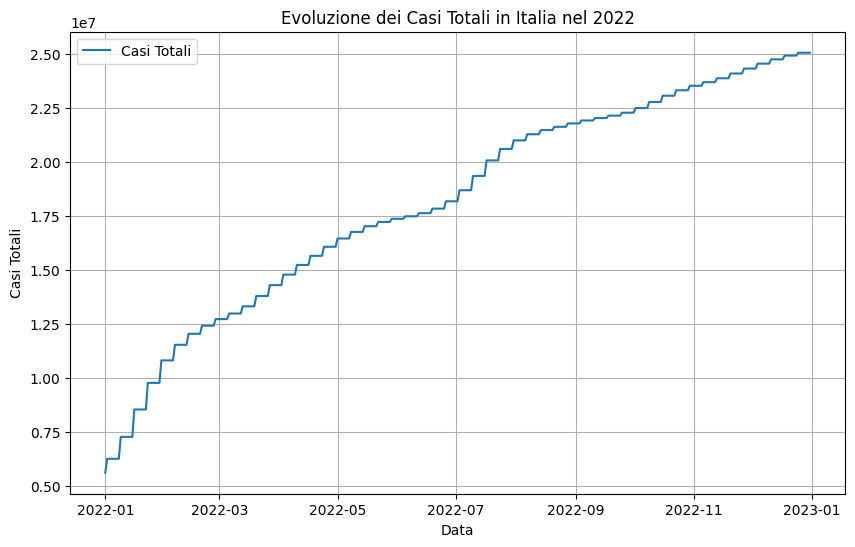

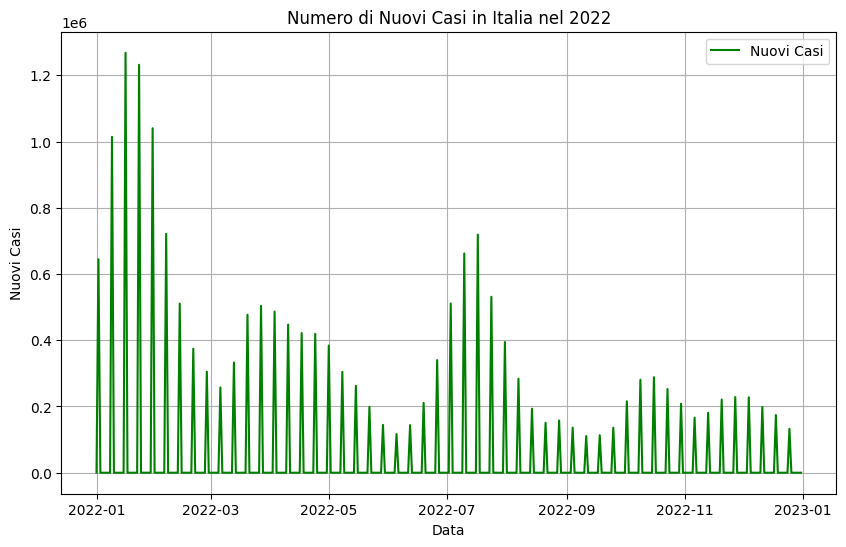

C:\Users\marti\AppData\Local\Temp\ipykernel_12292\2734777002.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_2022["cumulative_new_cases"] = italy_2022["new_cases"].cumsum()


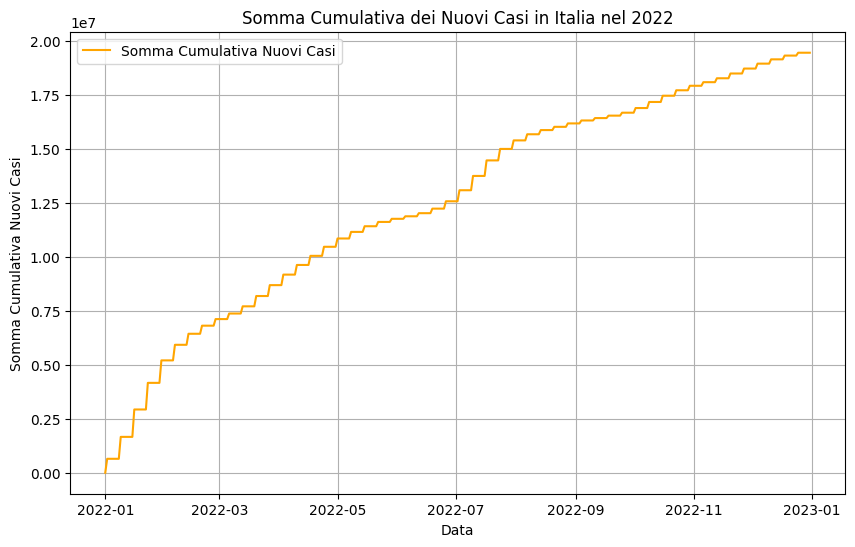

In [73]:
#Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. 
# Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). 
# Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali;


import seaborn as sns
import matplotlib.pyplot as plt



df["date"] = pd.to_datetime(df["date"])
italy_2022 = df[(df["location"] == "Italy") & (df["date"].dt.year == 2022)]

plt.figure(figsize=(10, 6))
plt.plot(italy_2022["date"], italy_2022["total_cases"], label="Casi Totali")
plt.xlabel("Data")
plt.ylabel("Casi Totali")
plt.title("Evoluzione dei Casi Totali in Italia nel 2022")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(italy_2022["date"], italy_2022["new_cases"], label="Nuovi Casi", color="green")
plt.xlabel("Data")
plt.ylabel("Nuovi Casi")
plt.title("Numero di Nuovi Casi in Italia nel 2022")
plt.legend()
plt.grid(True)
plt.show()


italy_2022["cumulative_new_cases"] = italy_2022["new_cases"].cumsum()

plt.figure(figsize=(10, 6))
plt.plot(italy_2022["date"], italy_2022["cumulative_new_cases"], label="Somma Cumulativa Nuovi Casi", color="orange")
plt.xlabel("Data")
plt.ylabel("Somma Cumulativa Nuovi Casi")
plt.title("Somma Cumulativa dei Nuovi Casi in Italia nel 2022")
plt.legend()
plt.grid(True)
plt.show()

#La somma cumulativa dei nuovi casi e l'evoluzione dei casi totali sono molto simili, poiché entrambi mostrano come i casi si accumulano nel tempo.
#Il numero di nuovi casi giornalieri offre una visione dettagliata delle variazioni giornaliere, aiutando a capire i 
#periodi di aumento rapido e i picchi che contribuiscono all'incremento complessivo dei casi totali.


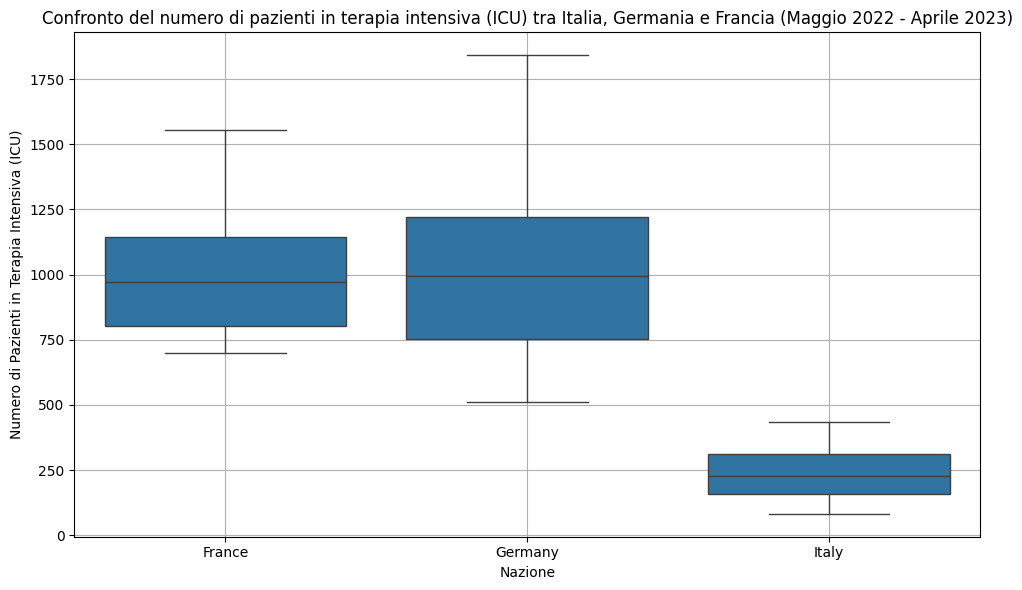

In [26]:
#Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo 
# il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso),
# e scrivere un breve commento a riguardo



nazioni_selezionate = ["Italy", "Germany", "France"]
data_nazioni_selezionate = df[(df['location'].isin(nazioni_selezionate)) & (df["date"] >= '2022-05-01') & 
(df["date"] <= '2023-04-30')]


plt.figure(figsize=(10, 6))
sns.boxplot(x="location", y="icu_patients", data=data_nazioni_selezionate)
plt.title("Confronto del numero di pazienti in terapia intensiva (ICU) tra Italia, Germania e Francia (Maggio 2022 - Aprile 2023)")
plt.xlabel("Nazione")
plt.ylabel("Numero di Pazienti in Terapia Intensiva (ICU)")
plt.grid(True)
plt.tight_layout()
plt.show()


#In Italia numero mediano di pazienti in terapia intensiva è relativamente basso rispetto alla Germania e alla Francia,
# suggerendo una minore pressione sulle unità di terapia intensiva italiane.
# La Germania presenta un numero mediano di pazienti in terapia intensiva più elevato, indicando una pressione maggiore
# sulle strutture sanitarie durante il periodo considerato.
# Anche la Francia ha un numero mediano di pazienti in terapia intensiva più alto rispetto all'Italia,
# ma con una maggiore variabilità nei dati.

In [77]:
#Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati 
# per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.


clean_data["date"] = pd.to_datetime(clean_data["date"])

data_2023 = clean_data[clean_data["date"].dt.year == 2023]

nazioni_interessate = ["Italy", "Germany", "France", "Spain"]
data_nazioni = data_2023[data_2023["location"].isin(nazioni_interessate)]

null_counts_by_nation = data_nazioni.groupby("location")['hosp_patients'].apply(lambda x: x.isnull().sum())

print("Numero di valori nulli nella colonna 'hosp_patients' per nazione:\n", null_counts_by_nation)


data_nazioni['hosp_patients'].fillna(0, inplace=True)

somma_ospedalizzati = data_nazioni.groupby("location")["hosp_patients"].sum()

def format_with_point(x):
    return f"{x:,.0f}".replace(",", ".")


somma_ospedalizzati_formattata = somma_ospedalizzati.apply(format_with_point)


print("Somma dei pazienti ospedalizzati nel 2023 per nazione :\n", somma_ospedalizzati_formattata)




#Ho scelto di trattare i valori nulli nella colonna hosp_patients, sostituendoli con lo zero per le nazioni di interesse nel 2023.
# Ho optato per questa strategia poiché, secondo me, l'utilizzo della mediana per la sostituzione potrebbe alterare 
# la distribuzione dei dati,mentre il valore zero riflette in modo più accurato l'assenza di pazienti ospedalizzati.

Numero di valori nulli nella colonna 'hosp_patients' per nazione:
 location
France     275
Germany    365
Italy        0
Spain      203
Name: hosp_patients, dtype: int64
Somma dei pazienti ospedalizzati nel 2023 per nazione :
 location
France     1.382.574
Germany            0
Italy      1.175.272
Spain        354.602
Name: hosp_patients, dtype: object


C:\Users\marti\AppData\Local\Temp\ipykernel_12292\1077048921.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["date"] = pd.to_datetime(clean_data["date"])
C:\Users\marti\AppData\Local\Temp\ipykernel_12292\1077048921.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_